In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

--> Loading the MNIST data from Keras' datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
print("X_train Shape: ", X_train.shape)
print("Y_train Shape: ", Y_train.shape)
print("X_test Shape: ", X_test.shape)
print("Y_test Shape: ", Y_test.shape)

X_train Shape:  (60000, 28, 28)
Y_train Shape:  (60000,)
X_test Shape:  (10000, 28, 28)
Y_test Shape:  (10000,)


Training Data = 60,000 Images
Test Data = 10,000 Images

In [5]:
# Printing the 10th Image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


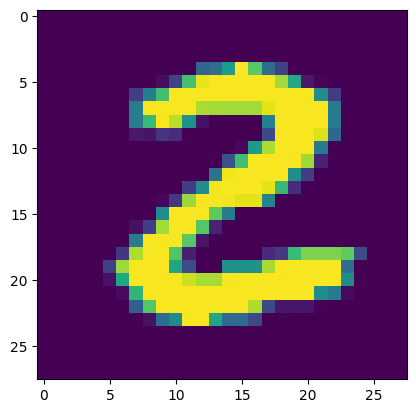

2


In [7]:
# Displaying the image

plt.imshow(X_train[25])
plt.show()

# Label which will be the number shown in the image
print(Y_train[25])

--> Image Labels

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# Unique values in Y_train

print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
# Unique values in Y_test

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


In [11]:
# Therefore, the data is compatible

In [12]:
# Scaling the values

X_train = X_train/255
X_test = X_test/255

In [13]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

--> Building the Neural Network

In [14]:
# Setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='sigmoid')
])

In [15]:
# Compiling the Model

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 5s 2ms/step - loss: 0.3639 - accuracy: 0.8975
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1487 - accuracy: 0.9554
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1083 - accuracy: 0.9668
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0890 - accuracy: 0.9727
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0725 - accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0623 - accuracy: 0.9801
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0554 - accuracy: 0.9820
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0476 - accuracy: 0.9846
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0417 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0

--> Training Data Accuracy = 99.09%

In [17]:
# Accuracy on Testing data

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0980 - accuracy: 0.9747
0.9746999740600586


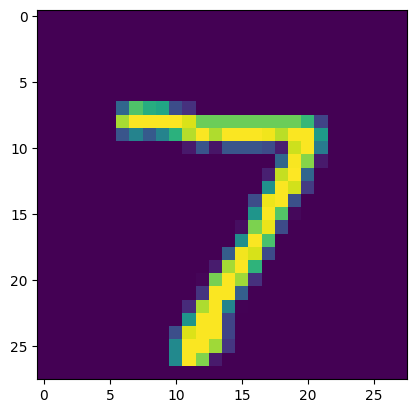

In [18]:
# First data point in X_test

plt.imshow(X_test[0])
plt.show()

In [19]:
print(Y_test[0])

7


--> Therefore, the image in X_test[0] is the number '7'.

In [20]:
# Using the model to make the prediction

y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [21]:
print(y_pred.shape)

(10000, 50)


In [22]:
print(y_pred[0])

[8.9666428e-05 3.1919297e-04 3.4345585e-01 7.0330316e-01 5.8889891e-06
 6.9657381e-04 1.1296673e-08 9.9999905e-01 3.5589162e-02 2.8955644e-01
 8.8634606e-13 1.1526753e-12 6.4776434e-11 9.1829773e-12 2.4182207e-11
 3.1998720e-11 3.2119488e-11 5.3592348e-12 1.2330483e-12 6.1911548e-12
 4.2922499e-13 3.2544373e-11 1.0545192e-12 4.9783116e-12 2.4629028e-11
 4.7733896e-12 2.7285778e-11 2.3273373e-11 3.3377359e-13 7.2234330e-13
 9.2861387e-12 3.7303275e-11 5.0947163e-12 2.6752702e-12 2.1881290e-11
 9.8360695e-12 9.6483802e-12 1.4257858e-11 1.9094002e-12 1.0664673e-12
 6.9431210e-12 4.9660493e-12 4.4486623e-11 1.4602330e-10 8.1485068e-13
 1.5420971e-12 6.2873648e-13 1.4470679e-11 5.0399207e-10 3.8930765e-11]


--> model.predict gives the prediction probability of each class

In [23]:
# Converting the prediction probabilities to class label. This basically gives you the actual number instead of probabilities. Currently, it is being done for a single element only.

label_for_first_image = np.argmax(y_pred[0])

In [24]:
label_for_first_image

7

--> This shows that our model has correctly predicted the value or has correctly identified the number from its image.

In [25]:
# Converting the prediction probabilities to class labels for the entire y_pred

y_pred_labels_all = [np.argmax(i) for i in y_pred]

print(y_pred_labels_all)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

--> Thus, we have obtained the actual numbers instead of their probabilities

--> Now, we will build the confusion matrix

In [26]:
# You basically have to compare the actual outputs (Y_test) and the predicted outputs (y_pred_labels_all)

conf_mat = confusion_matrix(Y_test, y_pred_labels_all)

In [27]:
print(conf_mat)

tf.Tensor(
[[ 965    1    1    2    0    2    5    2    2    0]
 [   0 1126    1    0    0    1    2    0    5    0]
 [   1    3 1004    3    3    3    1    7    7    0]
 [   0    1    3  981    0    8    0    6    3    8]
 [   0    1    3    0  955    1    4    1    0   17]
 [   2    0    0   10    1  863    4    3    5    4]
 [   2    1    0    3    4   12  933    0    3    0]
 [   1    5    9    2    1    0    0 1004    1    5]
 [   2    2    1   10    4    7    0    7  938    3]
 [   1    3    0    3   10    4    0   10    4  974]], shape=(10, 10), dtype=int32)


--> Creating a Heatmap

Text(0.5, 47.7222222222222, 'Predicted Labels')

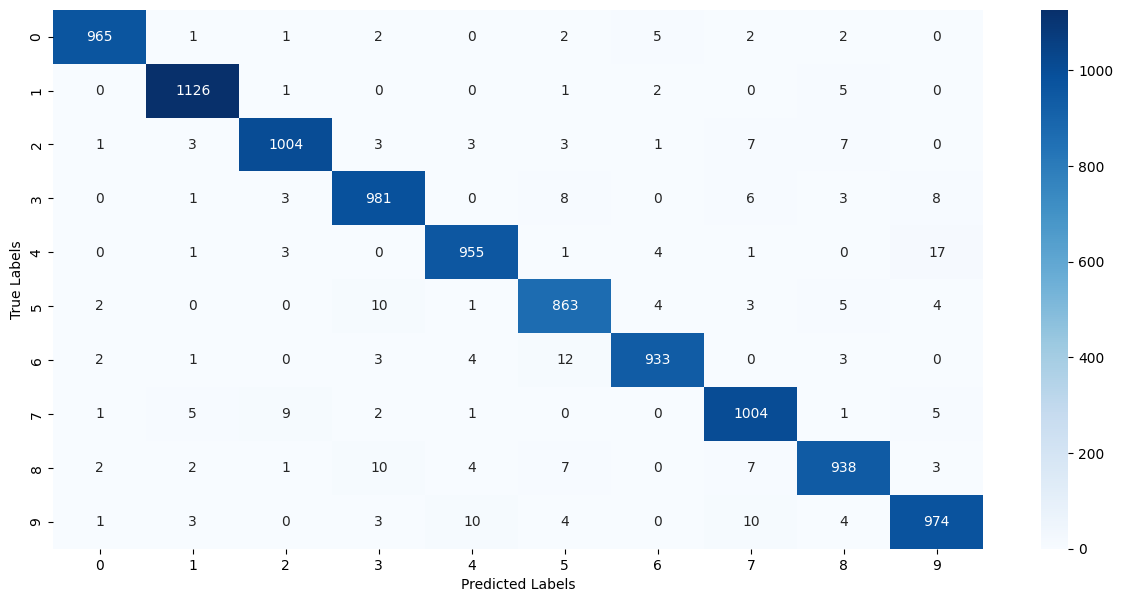

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

--> Building a Predictive System

In [29]:
# Taking the image as an input
# In this code, the input image is 7

input_image_path = 'image.png'

input_image = cv2.imread(input_image_path)

In [30]:
type(input_image)

numpy.ndarray

In [31]:
print(input_image)

[[[143 143 143]
  [110 110 110]
  [113 113 113]
  ...
  [113 113 113]
  [ 95  95  95]
  [195 195 195]]

 [[110 110 110]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [182 182 182]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 ...

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]

 [[113 113 113]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [185 185 185]]]


In [33]:
cv2.imshow('Image Window', input_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

print("You will have to close the image window manually.")

You will have to close the image window manually.


In [34]:
input_image.shape

(224, 225, 3)

In [35]:
# Converting the image form RGB to Gray Scale

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [37]:
grayscale.shape

(224, 225)

In [40]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [41]:
input_image_resize.shape

(28, 28)

--> Thus, we have obtained the desired shape

In [42]:
cv2.imshow('Image Window', input_image_resize)

cv2.waitKey(0)
cv2.destroyAllWindows()

print("You will have to close the image window manually.")

You will have to close the image window manually.


--> The image has shrunk

In [43]:
input_image_resize = input_image_resize/255

In [45]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [46]:
type(input_image_resize)

numpy.ndarray

In [47]:
type(image_reshaped)

numpy.ndarray

--> Now, we will make the model identify the image

In [48]:
input_prediction = model.predict(image_reshaped)

print(input_prediction)

1/1 [==============================] - 0s 46ms/step
[[8.6970344e-05 3.2444202e-04 3.4224254e-01 7.0992905e-01 6.0600391e-06
  6.7112746e-04 1.1168492e-08 9.9999905e-01 3.5478026e-02 2.9513472e-01
  8.6720052e-13 1.1260832e-12 6.3337953e-11 8.9847400e-12 2.3490695e-11
  3.0848855e-11 3.1607831e-11 5.2047021e-12 1.2224659e-12 6.0645785e-12
  4.2110933e-13 3.2153998e-11 1.0272366e-12 4.8765592e-12 2.4034785e-11
  4.6574628e-12 2.6714778e-11 2.2956472e-11 3.2309070e-13 7.0296384e-13
  9.0523934e-12 3.6763488e-11 4.9916226e-12 2.6228503e-12 2.1448001e-11
  9.5885183e-12 9.4092850e-12 1.3920033e-11 1.8702774e-12 1.0467959e-12
  6.7470344e-12 4.8548522e-12 4.3380563e-11 1.4329896e-10 8.0012559e-13
  1.5163283e-12 6.1028678e-13 1.4070987e-11 4.9133492e-10 3.7525497e-11]]


In [49]:
input_prediction = np.argmax(input_prediction)

print(input_prediction)

7


--> As you can see, the model has correctly identified the number in the image.